# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercise 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>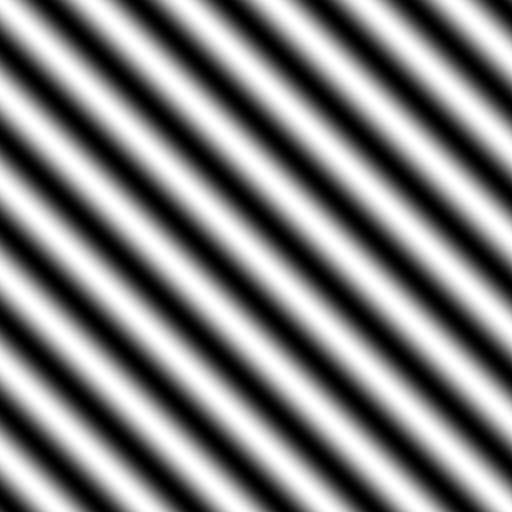</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    # ax = fig.gca(projection='3d')
    ax = plt.subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows to sample signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


<IPython.core.display.Javascript object>


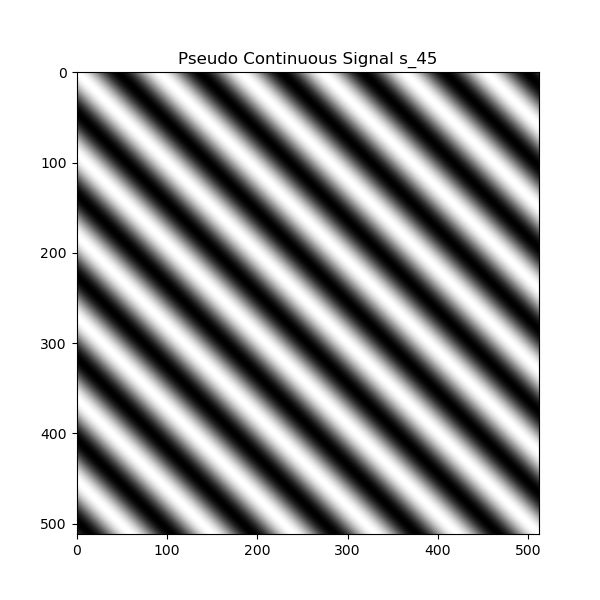

3D Graph: 


<IPython.core.display.Javascript object>


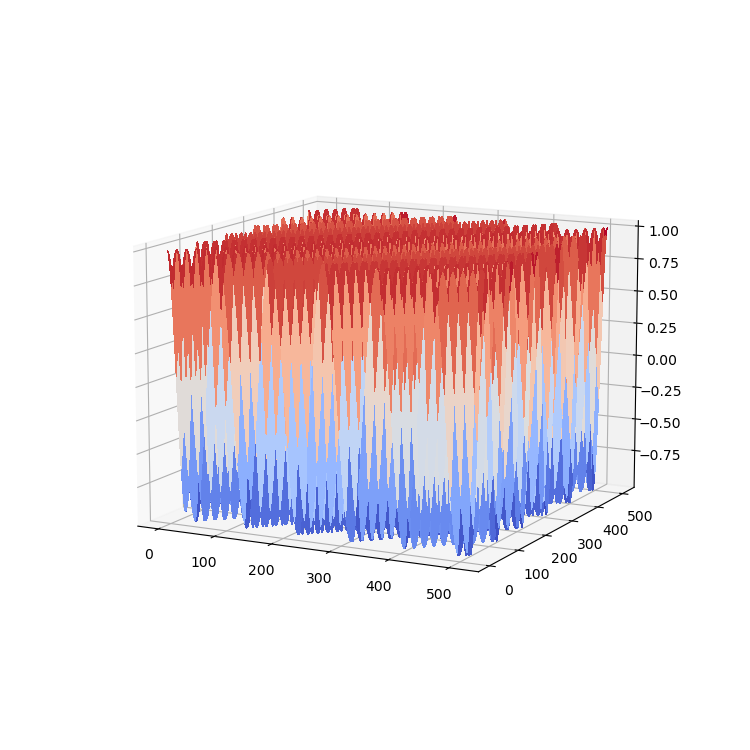

C:\Users\Enrico\AppData\Local\Temp\ipykernel_8196\2371789090.py:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection='3d')


In [4]:
sinusoid = sinusoid2d(1, 45, 512, 64, 1)
imshow(sinusoid, title='Pseudo Continuous Signal s_45')

print('3D Graph: ')
surf(sinusoid, title='3D plot of the Signal')

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

For a periodic signal such as the cosine, we observe a repetition in the signal's pattern every period of time. For this reason the signal is studied throughout 1 period (since its behaviour is going to repeat itself) and its maximum frequency corresponds to its f0 (which is inversly proportional to the wave's period T0). 

Since the 2D wave seen presents an orientation given by an angle of 45 degrees, we must take this into account when studying its max frequency. 

Being the max frequency for the 2D wave is f0, we have to project it on the t and u axis, so that:
  - ft_max = f0*(cos45)
  - fu_max = f0*(sin45)

with f0 = 1/T0, and T0 = 64.

Then, fm = max(ft_max, fu_max)

Fm can be used to derive the Shannons's limit frequency for the sampling of s45 because to correctly sample the image (and avoid disturbances such as aliasing) the chosen frequency for the sampling should be bigger than 2*fmax.

Since the studied signal is developed in two directions, we have to observe that the Shannon's limit is respected in both directions. By using the biggest frequency between the two, we are sure to avoid aliasing in both directions.

2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


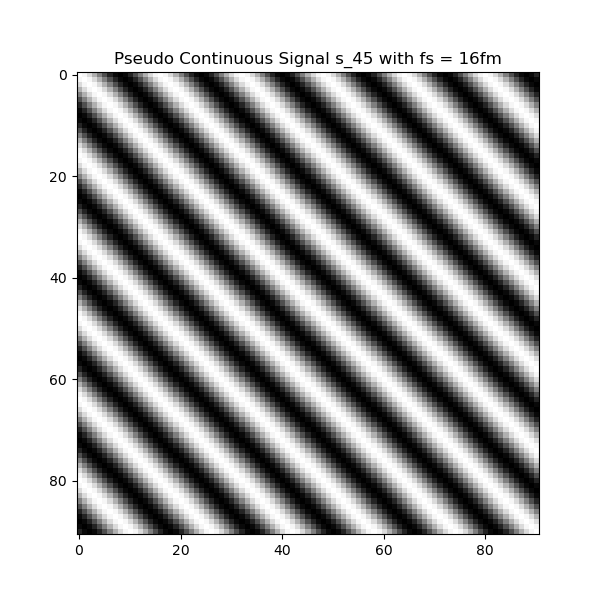

In [9]:
t_s = 1 / (16*((1/64)*(np.sqrt(2))/2))
sinusoid_sample_16 = sinusoid2d(1, 45, 512, 64, t_s)
imshow(sinusoid_sample_16, title='Pseudo Continuous Signal s_45 with fs = 16fm')

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.



FT of the sampled signal:




<IPython.core.display.Javascript object>


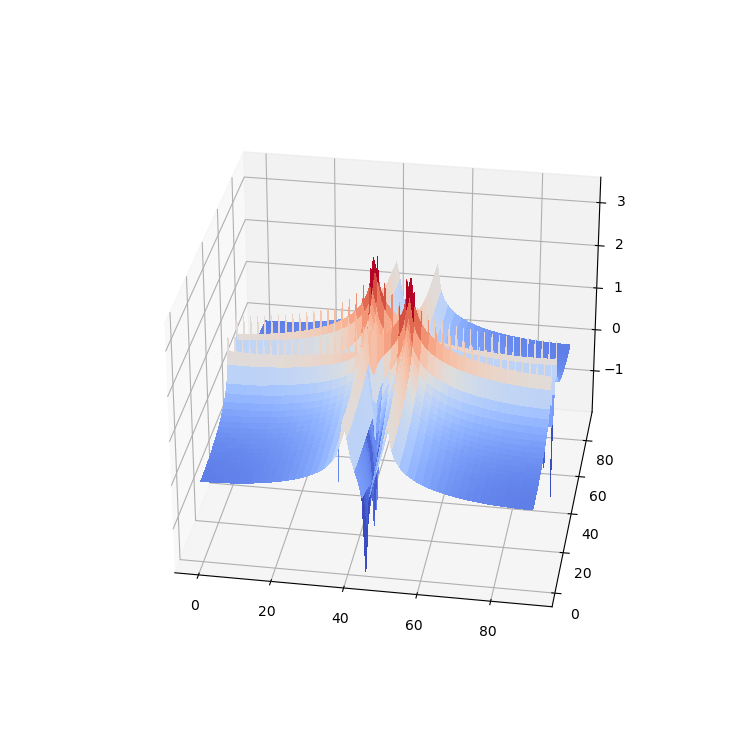

In [11]:
ft_sampled_16 = fft2(sinusoid_sample_16)
log_ft_16 = np.log10(np.abs(fftshift(ft_sampled_16)))
print('\n\nFT of the sampled signal:\n\n')
surf(log_ft_16)

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

- We can observe from the surf grafic the presence of two Dirac peaks in the Fourier Transform of the 2D signal, which is consistent with the theory studied, since the FT of a cosine function is given by two Dirac impulses, centered in +f0 and -f0.

- As the sampling period increases (and the sampling frequency decreases), the signal separation decreases. When the sampling frequency drops below the Nyquist rate, the frequencies will cross over and cause aliasing. We can observe on the plotted graphs above how increasing the sampling frequency, and decreasing the Ts, shows that the FT spectrum of the sampled signal is very similar to the one of the continuous signal. On the other hand, the more we decrease the frequency, the more the spectrum is going to be unprecise.

- The reason why, aside the two Dirac peaks, we can see other structures, is due to the fact that there is always a bit of unprecision between the chosen sampling frequency and the actually sampling process. This way if the chosen sampling frequency is fs = 4f0, in the reality of the sampling process there is a discrepancy so that the sampling frequency will be around fs=3.7f0, which leads to have some noise in the spectrum. 

- By increasing the T0 we can observe that the two Dirac peaks converge into one because the fourier transform of the cosine function is given by two Dirac peaks centered in +f0 and -f0. For T0 that tends to the infinite, the two Dirac functions will tend to become one as f0 is equal to 1/T0 and for T0 -> infinite, f0 -> 0, so both the peaks will tend to be centered in 0. Even if in theory this happens for T0 going to the infinite, we can start appreciating this phenomenon for T0 = 4*T0_chosen (which is 64), so for T0=256

3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


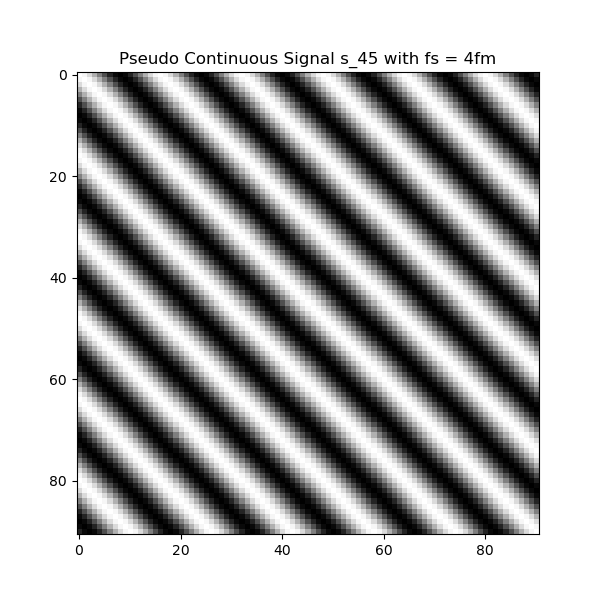



FT of the sampled signal:




<IPython.core.display.Javascript object>


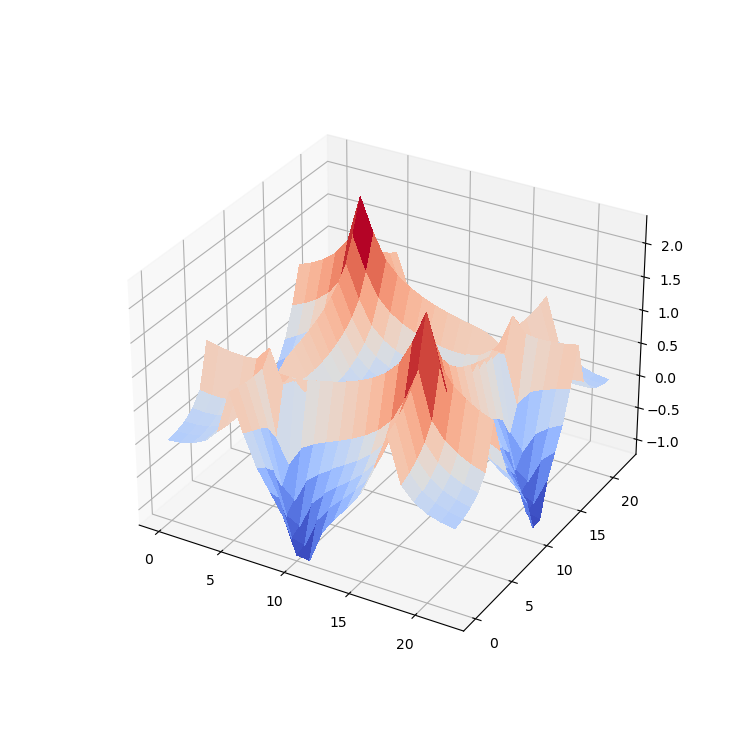

In [12]:
t_s = 1 / (4*((1/64)*(np.sqrt(2))/2))
sinusoid_sample_4  = sinusoid2d(1, 45, 512, 64, t_s)
imshow(sinusoid_sample_16, title='Pseudo Continuous Signal s_45 with fs = 4fm')

ft_sampled_4 = fft2(sinusoid_sample_4)
log_ft_4 = np.log10(np.abs(fftshift(ft_sampled_4)))
print('\n\nFT of the sampled signal:\n\n')
surf(log_ft_4)

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [13]:
def error(A, L, sinusoid1, sinusoid2):
    const = 1/(2*A*(np.power(L, 2)))
    average_error= 0
    for k in range(0,L):
        for l in range(0,L):
            val = np.abs(sinusoid1[k,l]-sinusoid2[k,l])
            average_error += val       
    return average_error*const

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

<IPython.core.display.Javascript object>


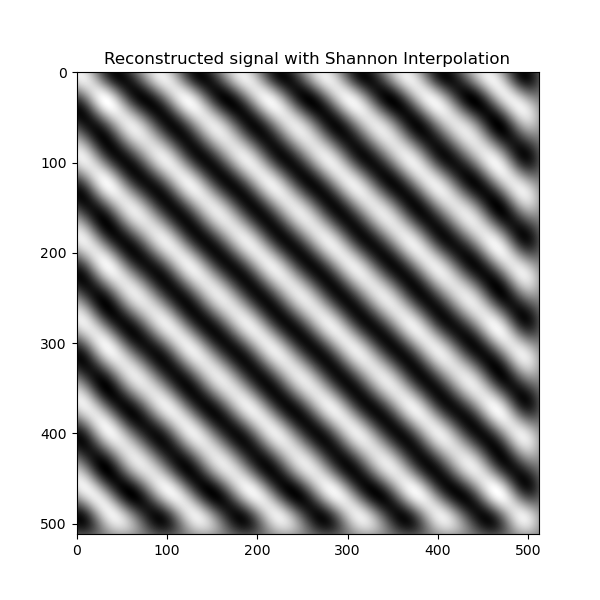



PARALLEL BETWEEN ORIGINAL SIGNAL AND RECONSTRUCTED:




ORIGINAL SIGNAL




<IPython.core.display.Javascript object>


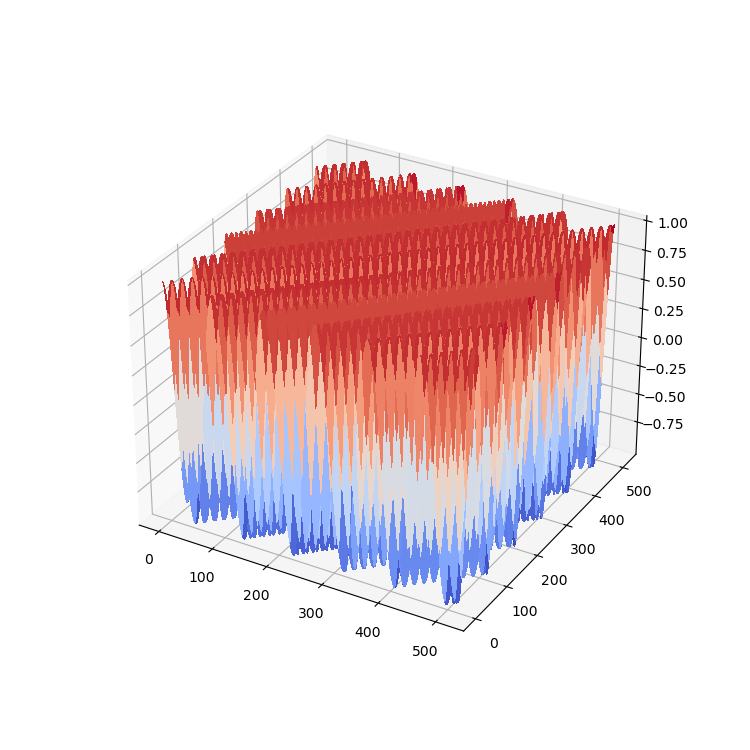



RECONSTRUCTED SIGNAL




<IPython.core.display.Javascript object>


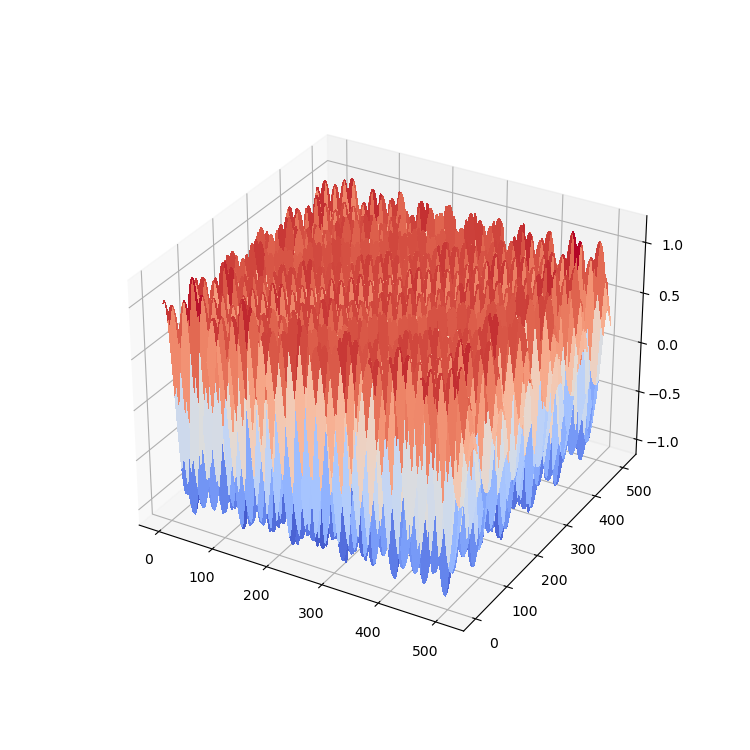



ORIGINAL FT SPECTRUM




<IPython.core.display.Javascript object>


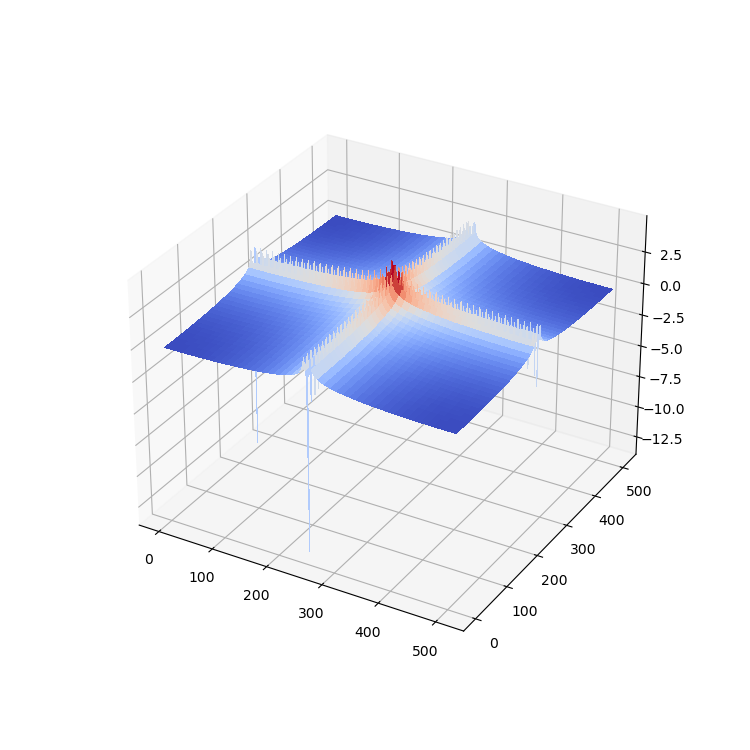



RECONSTRUCTED FT SPECTRUM




<IPython.core.display.Javascript object>


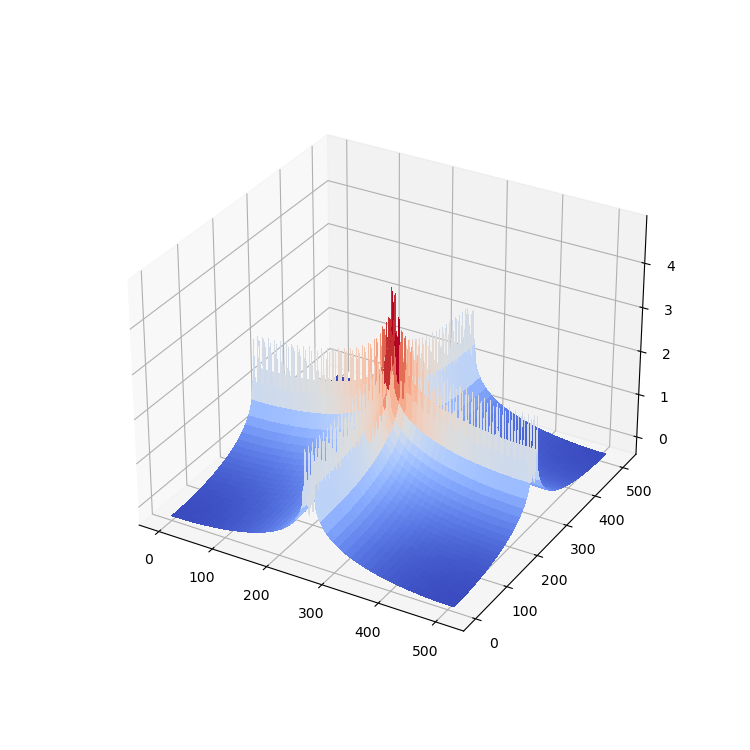



RELATIVE AVERAGE ERROR: 
0.022936924363102615


In [17]:
reconstructed_signal = shannonInterpolation(sinusoid_sample_4, t_s, 512)

imshow(reconstructed_signal, title='Reconstructed signal with Shannon Interpolation')

ft_reconstructed = fft2(reconstructed_signal)
spectrum_rec = np.log10(np.abs(fftshift(ft_reconstructed)))

print('\n\nPARALLEL BETWEEN ORIGINAL SIGNAL AND RECONSTRUCTED:\n\n')

print('\n\nORIGINAL SIGNAL\n\n')
surf(sinusoid)
print('\n\nRECONSTRUCTED SIGNAL\n\n')
surf(reconstructed_signal)
print('\n\nORIGINAL FT SPECTRUM\n\n')
surf(np.log10(np.abs(fftshift(fft2(sinusoid)))))
print('\n\nRECONSTRUCTED FT SPECTRUM\n\n')
surf(spectrum_rec)

print('\n\nRELATIVE AVERAGE ERROR: ')
print(error(1, 512, sinusoid, reconstructed_signal))

The first picture shows how the signal looks after having done the Shannon Interpolation to return into a continuous time domain. The signal is a bit more blurry, due to the little but inevitable loss of information as an effect of the process.
The next four graphs represent an analysis between the original signal and the reconstructed one, both in the time domain and comparing the spectrum of the two fourier transforms.

The last element shown is the relative average error between the signal and its reconstruction. Since the Shannon limit value of the sampling frequency was respected, even if there is a little loss of information, that results in about 2.3% of the original signal. 

4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

<IPython.core.display.Javascript object>


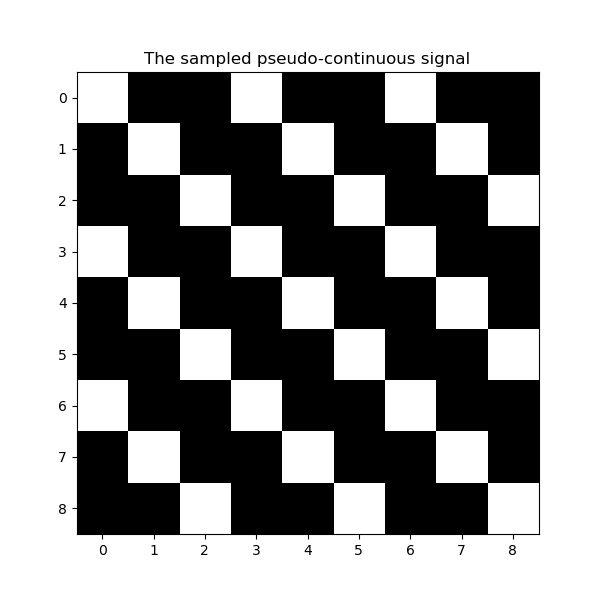



Spectrum of the sampled signal




<IPython.core.display.Javascript object>


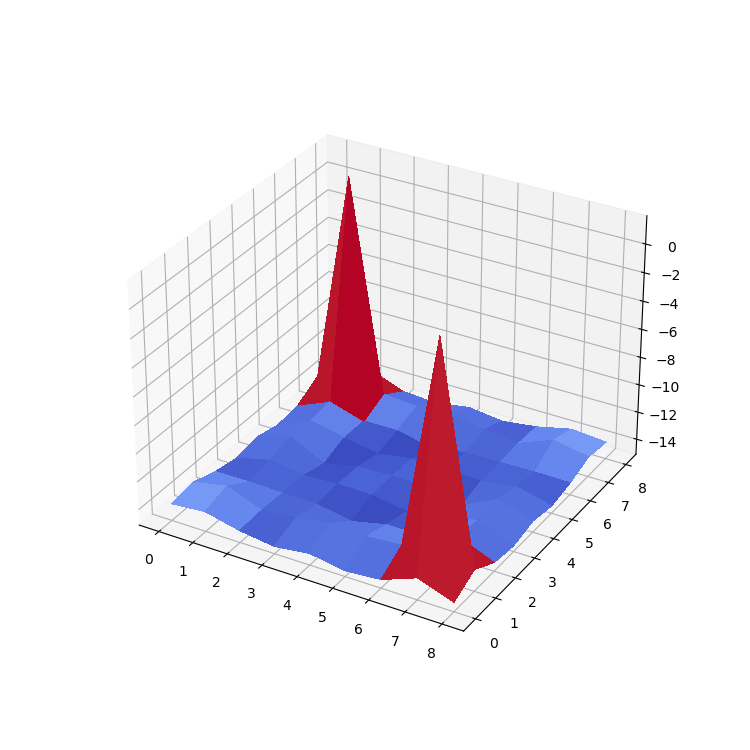



PARALLEL BETWEEN ORIGINAL SIGNAL AND RECONSTRUCTED:




ORIGINAL SIGNAL




<IPython.core.display.Javascript object>


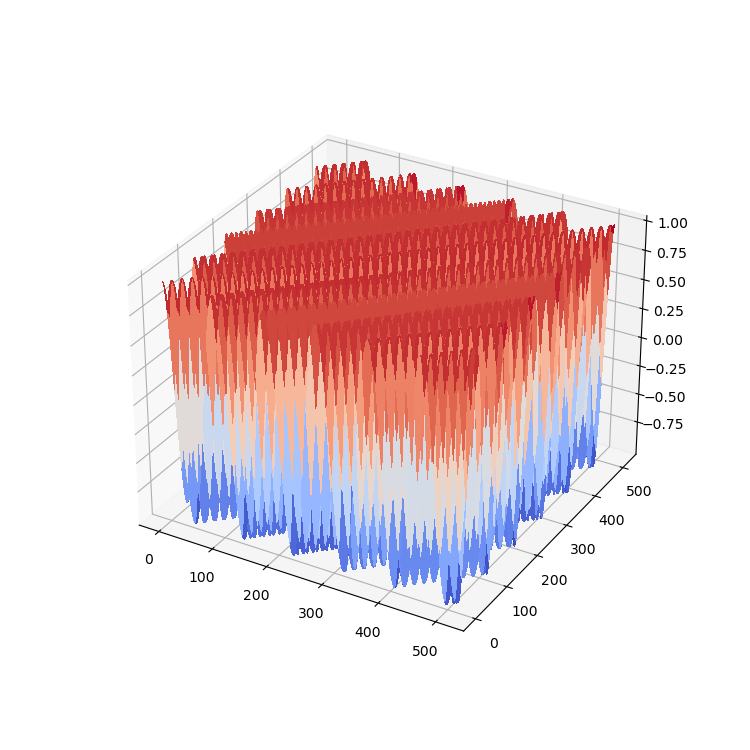



RECONSTRUCTED SIGNAL




<IPython.core.display.Javascript object>


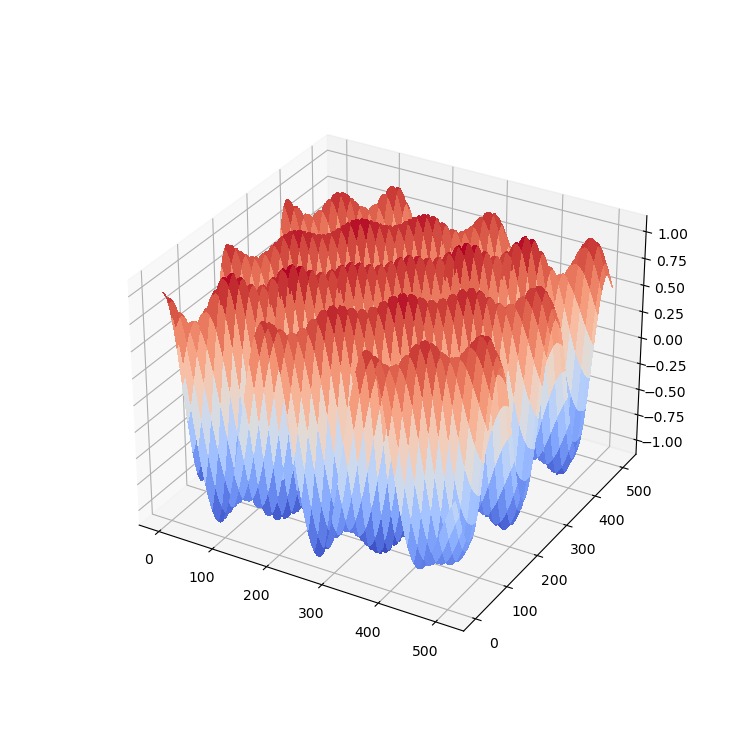



ORIGINAL FT SPECTRUM




<IPython.core.display.Javascript object>


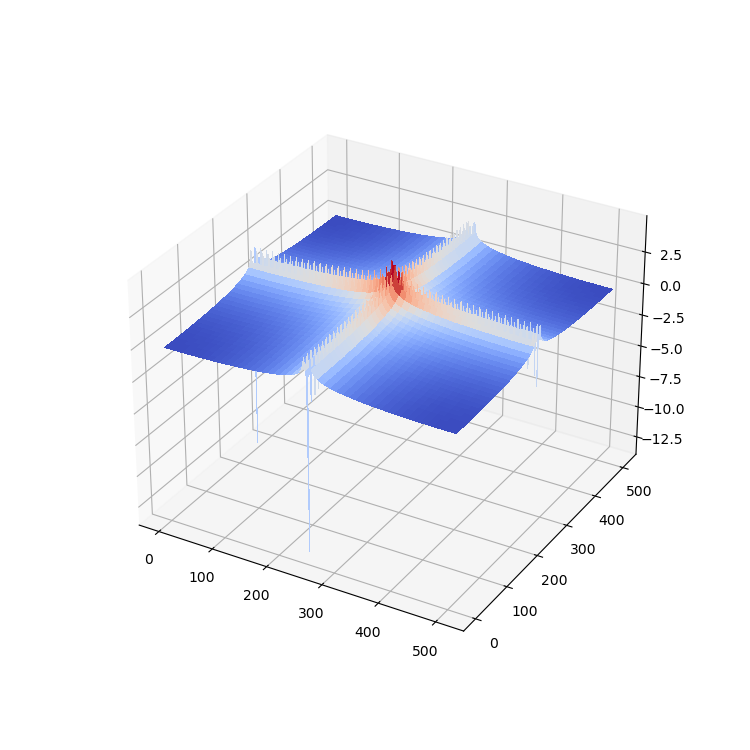



RECONSTRUCTED FT SPECTRUM




<IPython.core.display.Javascript object>


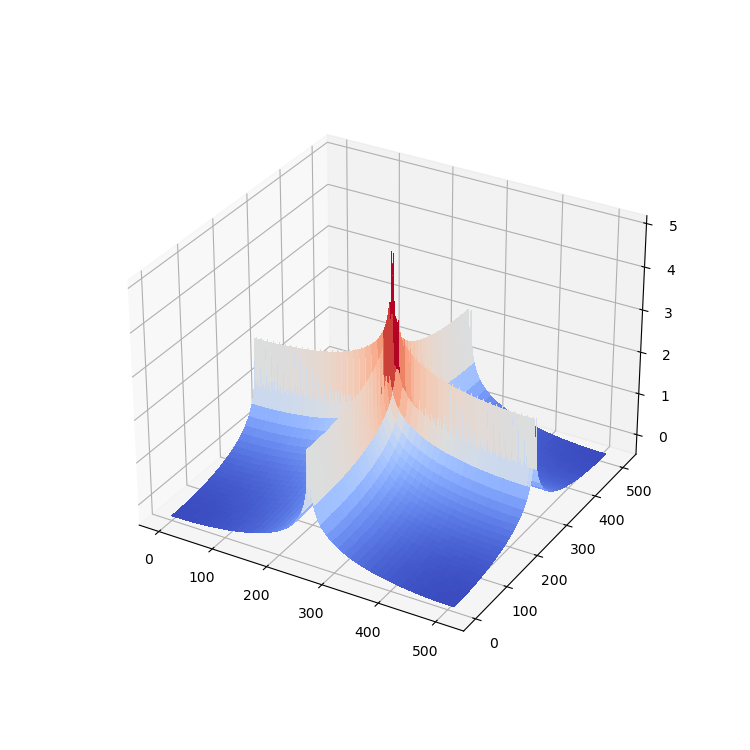



RELATIVE AVERAGE ERROR: 
0.40686264750146783


In [18]:
Ts_aliasing = 1/((3/2)*((1/64)*(np.sqrt(2))/2))

signal_aliasing = sinusoid2d(1, 45, 512, 64, Ts_aliasing)
imshow(signal_aliasing, title='The sampled pseudo-continuous signal')

ft_signal_aliasing = fft2(signal_aliasing)
log_aliasing = np.log10(np.abs(fftshift(ft_signal_aliasing)))

print('\n\nSpectrum of the sampled signal\n\n')
surf(log_aliasing)

reconstructed_aliasing = shannonInterpolation(signal_aliasing, Ts_aliasing, 512)
ft_reconstructed_aliasing = fft2(reconstructed_aliasing)
spectrum_rec_alias = np.log10(np.abs(fftshift(ft_reconstructed_aliasing)))

print('\n\nPARALLEL BETWEEN ORIGINAL SIGNAL AND RECONSTRUCTED:\n\n')
print('\n\nORIGINAL SIGNAL\n\n')
surf(sinusoid)
print('\n\nRECONSTRUCTED SIGNAL\n\n')
surf(reconstructed_aliasing)
print('\n\nORIGINAL FT SPECTRUM\n\n')
surf(np.log10(np.abs(fftshift(fft2(sinusoid)))))
print('\n\nRECONSTRUCTED FT SPECTRUM\n\n')
surf(spectrum_rec_alias)

print('\n\nRELATIVE AVERAGE ERROR: ')
print(error(1, 512, sinusoid, reconstructed_aliasing))

The situation now is very different, since the new sampling frequency does not respect the Shannon limit. The loss of information is easily noticed in the analysis of the original signal versus the one reconstructed from the sampled signal (first two 3D plots). 

The relative average error in this case is 40.7%, a non-transcurable amount.
This is caused by the aliasing effect, which causes different signals to become indistinguishable (or aliases of one another) when sampled.

Having chosen an unsufficiently large sample rate to sample the signal, it causes appearance of frequencies in the amplitude-frequency spectrum, that are not in the original signal. This way when we try to reconstruct the signal using Shannon Interpolation, the reconstructed signal does not correpond to the original one. 

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

<IPython.core.display.Javascript object>


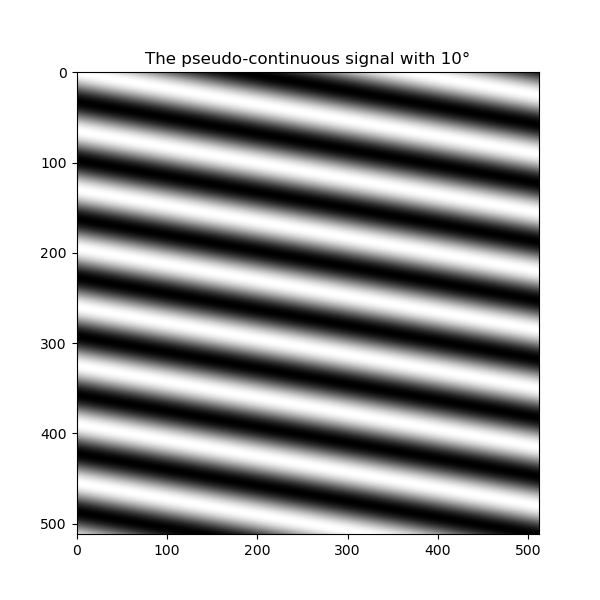

<IPython.core.display.Javascript object>


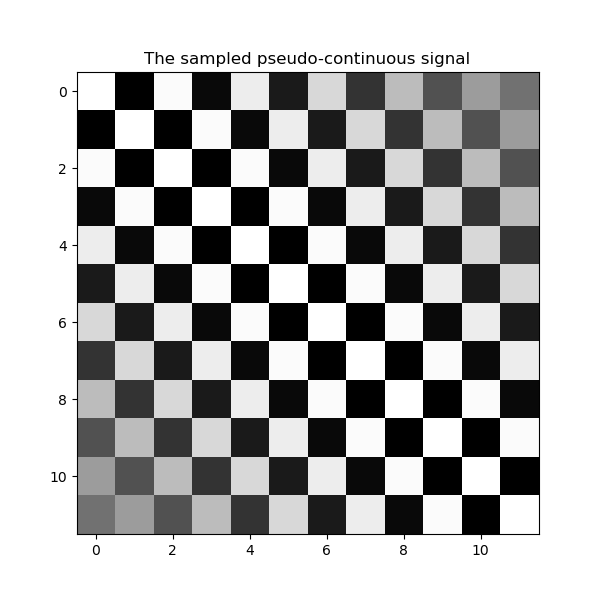



PARALLEL BETWEEN ORIGINAL SIGNAL AND RECONSTRUCTED:




ORIGINAL SIGNAL




<IPython.core.display.Javascript object>


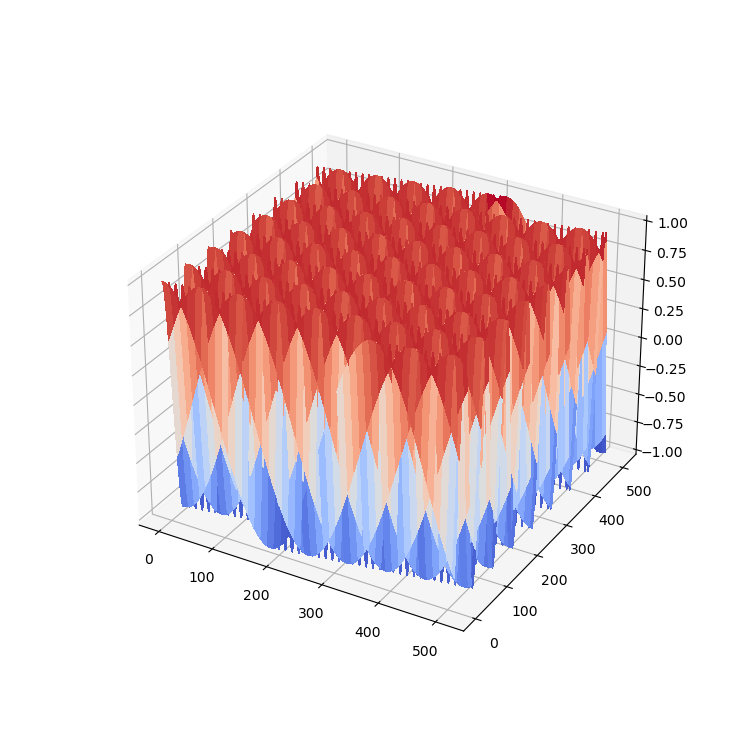



RECONSTRUCTED SIGNAL




<IPython.core.display.Javascript object>


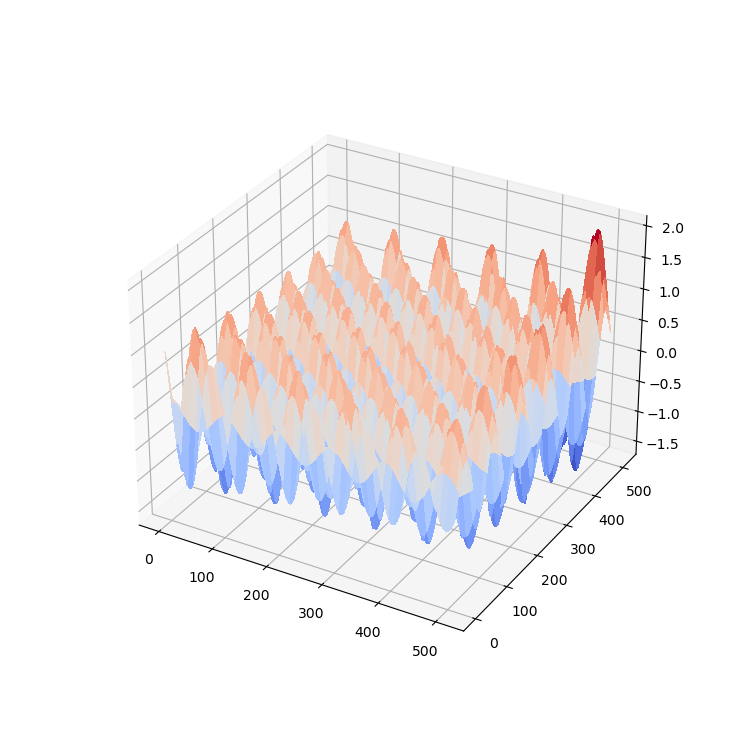



ORIGINAL FT SPECTRUM




<IPython.core.display.Javascript object>


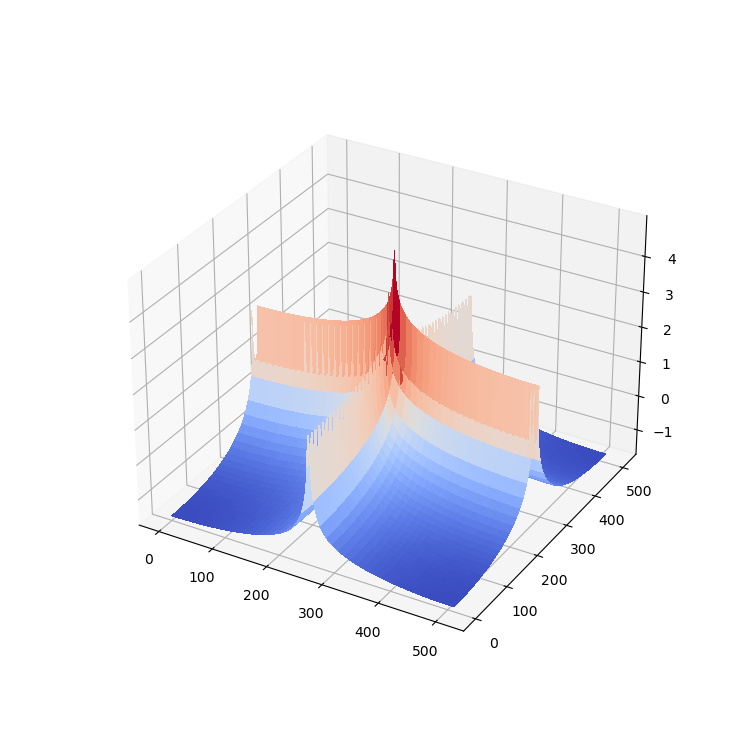



RECONSTRUCTED FT SPECTRUM




<IPython.core.display.Javascript object>


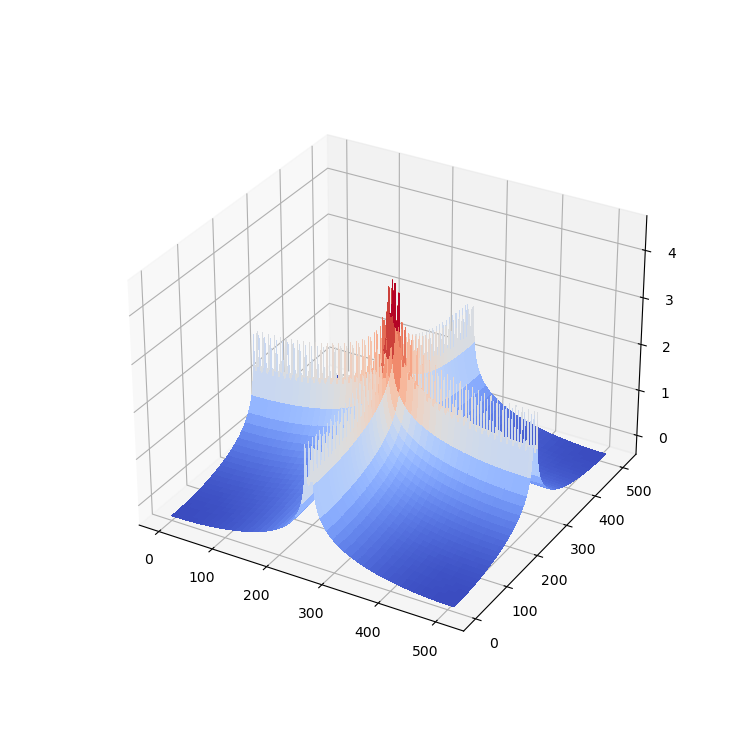



RELATIVE AVERAGE ERROR: 
0.37542788933806087


In [21]:
signal_10 = sinusoid2d(1, 10, 512, 64, 1)
imshow(signal_10, title='The pseudo-continuous signal with 10°')

Ts_aliasing_10_deg = 1/((3/2)*((1/64)*np.cos(np.deg2rad(10))))

sampled_signal_10 = sinusoid2d(1, 45, 512, 64, Ts_aliasing_10_deg)
imshow(sampled_signal_10, title='The sampled pseudo-continuous signal')

reconstructed_10 = shannonInterpolation(sampled_signal_10, Ts_aliasing_10_deg, 512)
FT_reconstructed_10 = fft2(reconstructed_10)
spectrum_rec_10 = np.log10(np.abs(fftshift(FT_reconstructed_10)))

print('\n\nPARALLEL BETWEEN ORIGINAL SIGNAL AND RECONSTRUCTED:\n\n')
print('\n\nORIGINAL SIGNAL\n\n')
surf(signal_10)
print('\n\nRECONSTRUCTED SIGNAL\n\n')
surf(reconstructed_10)
print('\n\nORIGINAL FT SPECTRUM\n\n')
surf(np.log10(np.abs(fftshift(fft2(signal_10)))))
print('\n\nRECONSTRUCTED FT SPECTRUM\n\n')
surf(spectrum_rec_10)

print('\n\nRELATIVE AVERAGE ERROR: ')
print(error(1, 512, signal_10, reconstructed_10))

When doing the Shannon Interpolation of the sampled signal, in this case, we are considering a theta of 10°. 
Even though the value of the sampling frequency is too little, we have to take into account that to choose the maximum frequency of the signal we are actually considering f_max = max(ft_max, fu_max).

While in the exercise above the signal presented an angle theta equal to 45°, which meant that ft_max = f0*cos(theta) and fu_max = f0*sin(theta) actually had the same value, here with an angle theta equal to 10° there is a big difference between the maximum frequency on the t-axis and the u-axis.

This means that with a sampling frequency like the one chosen, that does not respect the Shannon limit for f_max, it actually does not respect the limit only on the t-axis of the signal, while it's still a valid value on the u-axis.

For this reason, even if there is loss of information, we can appreciate that it is smaller then the last case - here it is only the 18.6% of the signal.

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.



ORIGINAL SIGNAL




<IPython.core.display.Javascript object>


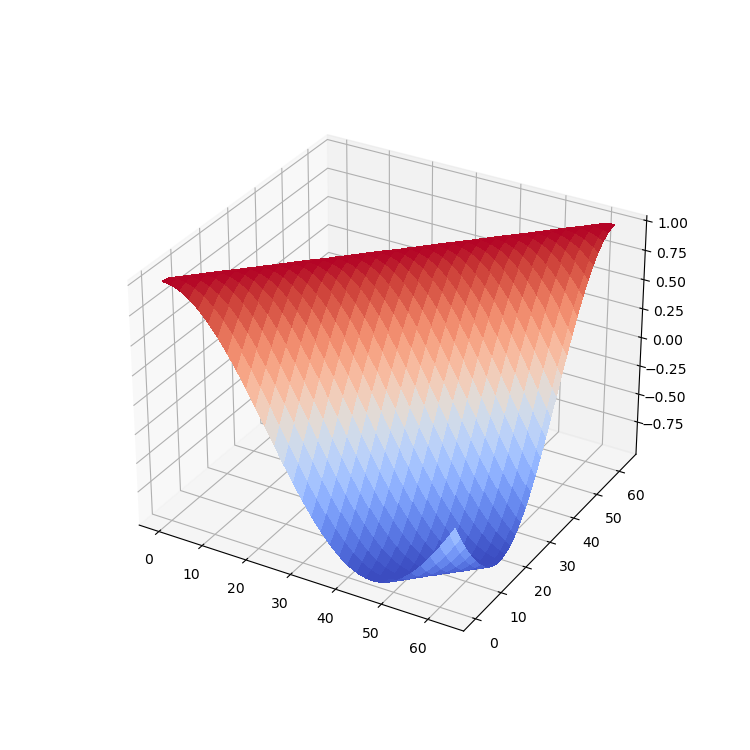



SAMPLED SIGNAL




<IPython.core.display.Javascript object>


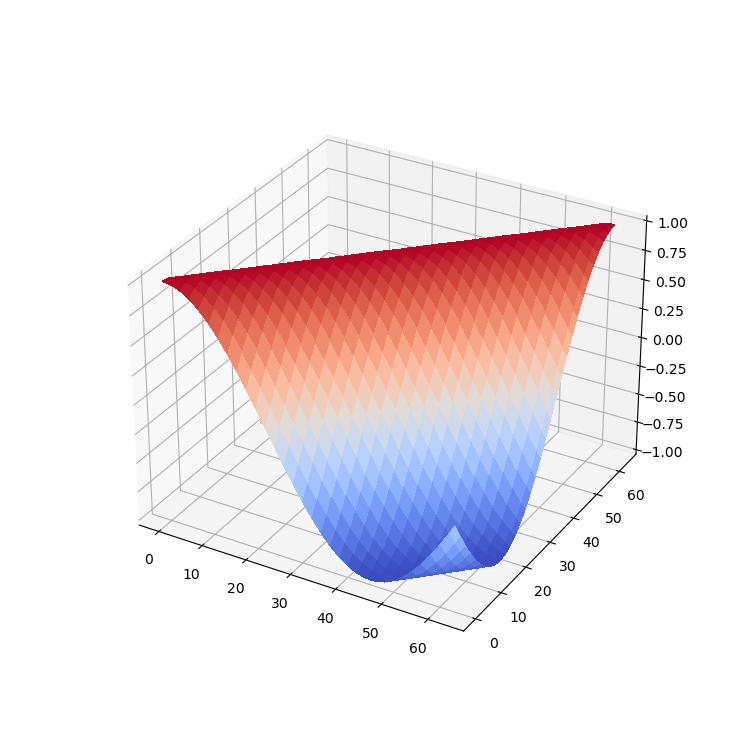



SAMPLED SIGNAL WITHOUT LOOPS




<IPython.core.display.Javascript object>


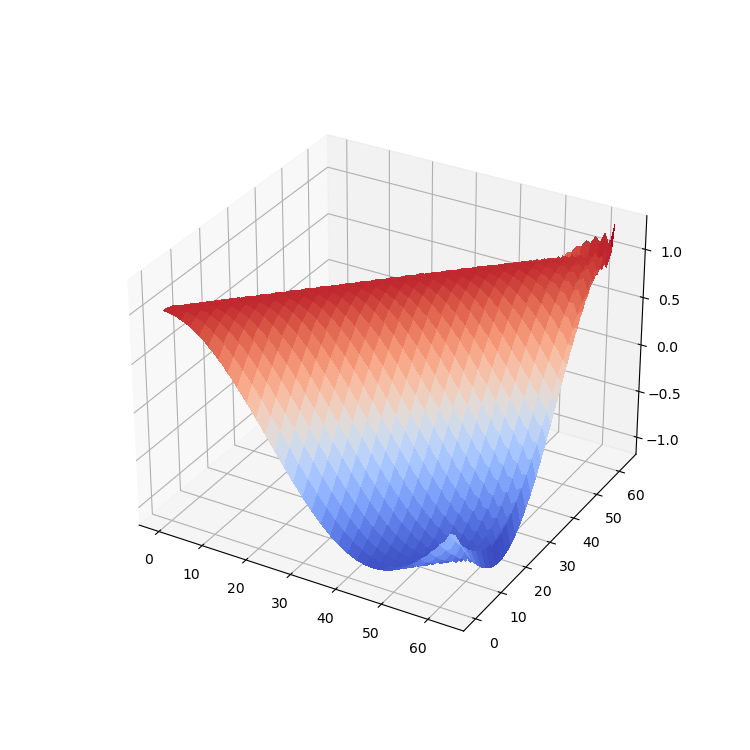



RUNTIME OF THE SHANNON INTERPOLATION AS PRESENTED: 
0.1875


RUNTIME OF THE SHANNON INTERPOLATION WITH TWO LOOPS: 


C:\Users\Enrico\AppData\Local\Temp\ipykernel_8196\2371789090.py:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection='3d')


<IPython.core.display.Javascript object>


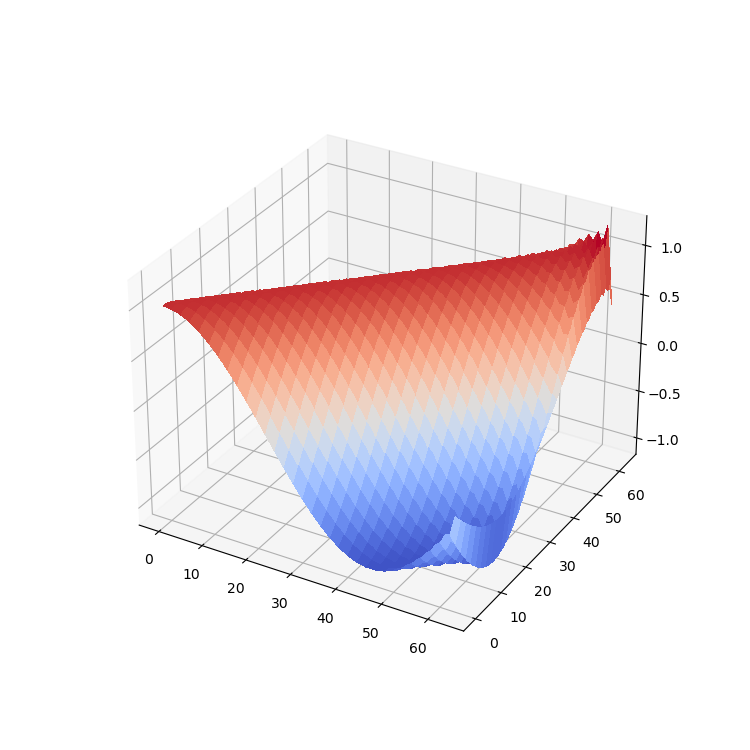



RUNTIME OF THE SHANNON INTERPOLATION WITH LOOPS: 
0.46875


In [22]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below
def loopShannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double]"""
    n, m = I.shape
    Y = np.zeros(n*size).reshape(n,size)
    for i in range(0,size):
        for j in range(0,n):
            Y[i][j] = np.sinc((i/Ts)-j)    
    X = np.zeros(m*size).reshape(m,size)
    for i in  range(0, size): 
        for j in range(0, m): 
            X[i][j] = np.sinc((i/Ts) - j)
    return np.matmul(X.T, np.matmul(I, Y))


signal_small = sinusoid2d(1, 45, 64, 64, 1) 
print('\n\nORIGINAL SIGNAL\n\n')
surf(signal_small)

Ts_90 = 1/(90*((1/64)*(np.sqrt(2))/2))
small_sampled = sinusoid2d(1, 45, 64, 64, Ts_90) 
print('\n\nSAMPLED SIGNAL\n\n')
surf(small_sampled)

tic()
signalShannon = shannonInterpolation(signal_small, Ts_90, 64)
print('\n\nSAMPLED SIGNAL WITHOUT LOOPS\n\n')
surf(signalShannon, title='reconstructed shannon')
print('\n\nRUNTIME OF THE SHANNON INTERPOLATION AS PRESENTED: ')
tac()


tic()
loopSignalShannon = loopShannonInterpolation(signal_small, Ts_90, 64)
print('\n\nRUNTIME OF THE SHANNON INTERPOLATION WITH TWO LOOPS: ')
surf(loopSignalShannon)
print('\n\nRUNTIME OF THE SHANNON INTERPOLATION WITH LOOPS: ')
tac()


## Exercise 2: aliasing on natural images

In this exercise, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

<IPython.core.display.Javascript object>


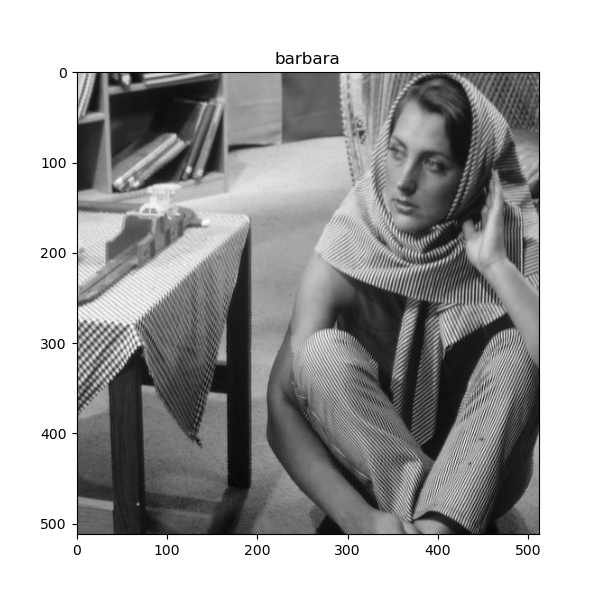

<IPython.core.display.Javascript object>


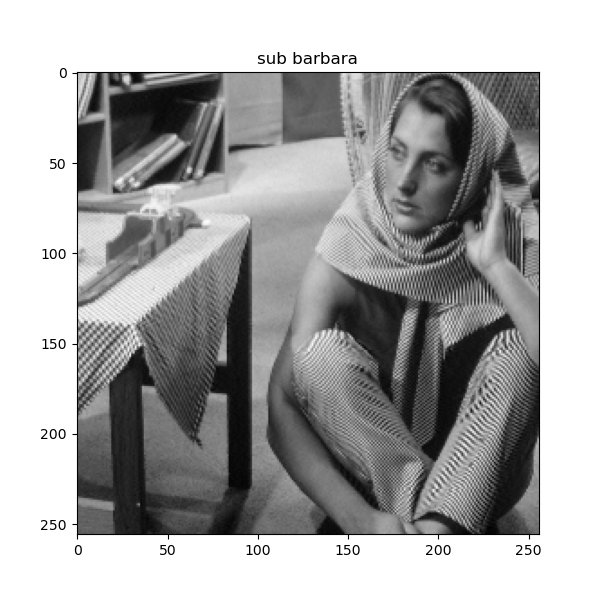

(512, 512)
(256, 256)


In [23]:
from PIL import Image
import matplotlib.pyplot as plt

barbara = np.array(Image.open('img/barbara.png'))
#print(barbara)
imshow(barbara, title='barbara')



def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

sub_barbara = subSample2(barbara)
#print(sub_barbara)
imshow(sub_barbara, title='sub barbara')

print(barbara.shape)
print(sub_barbara.shape)

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

With the subsample of the image of factor two we are keeping one value every two of the original matrix. This means that even if the image is still understandable, its pixels change frequency more abruptly, and we loose the effect of continuity that the original picture has.

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

<IPython.core.display.Javascript object>


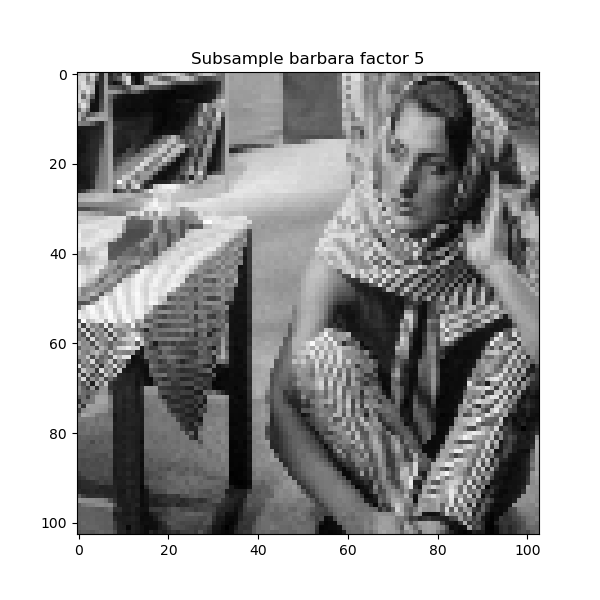



FT SUBSAMPLED IMAGE FACTOR 5




<IPython.core.display.Javascript object>


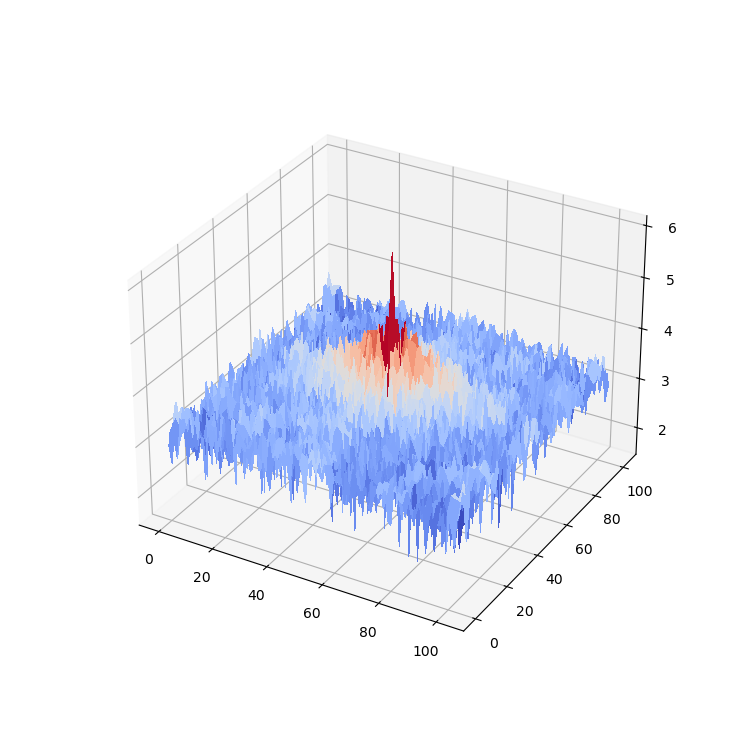

C:\Users\Enrico\AppData\Local\Temp\ipykernel_8196\2371789090.py:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection='3d')


<IPython.core.display.Javascript object>


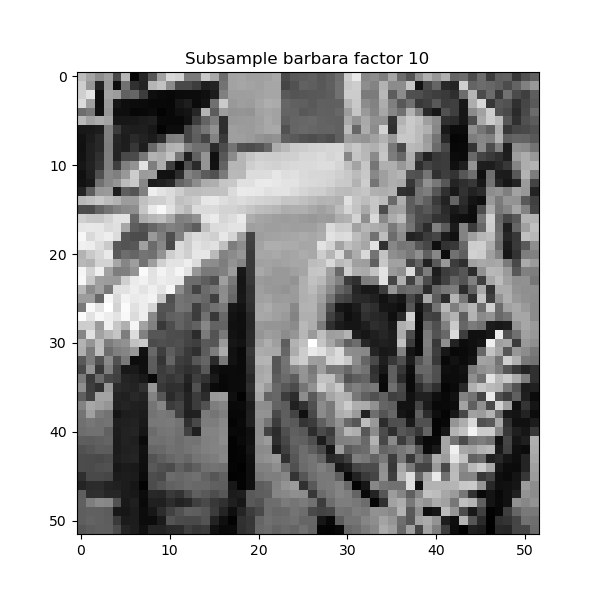



FT SUBSAMPLED IMAGE FACTOR 1O




<IPython.core.display.Javascript object>


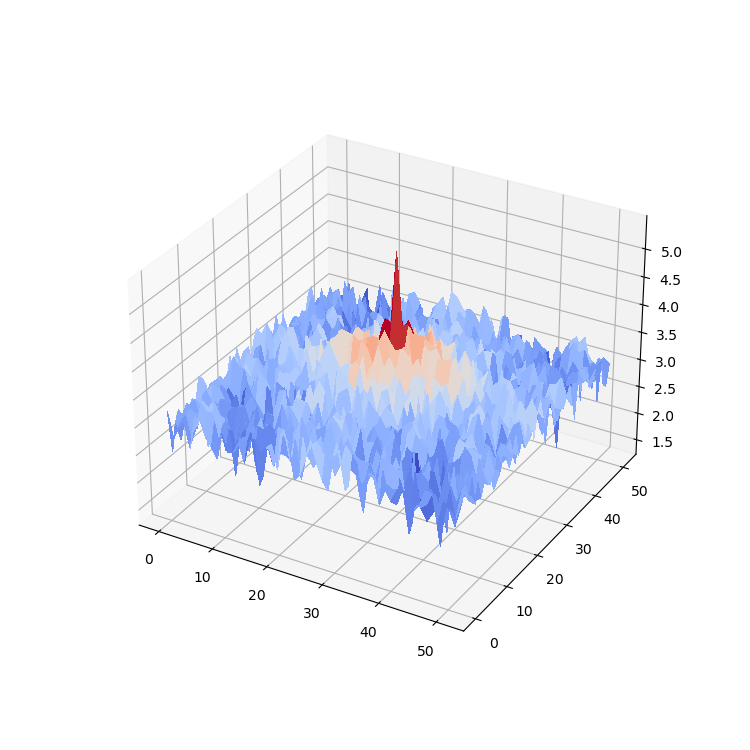

<IPython.core.display.Javascript object>


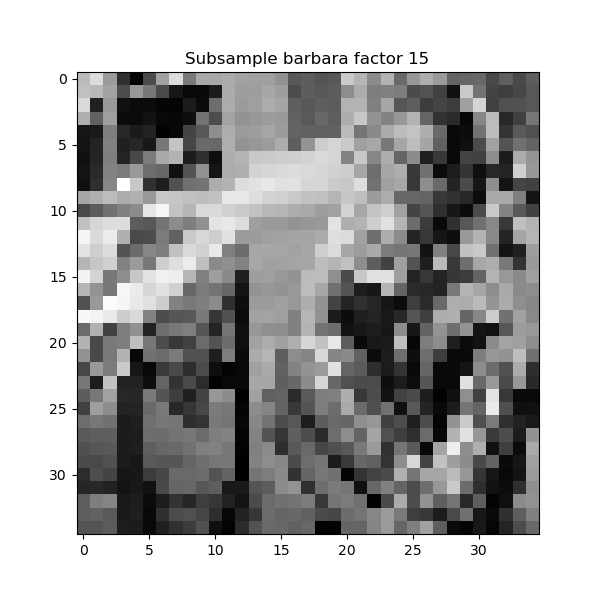



FT SUBSAMPLED IMAGE FACTOR 15




<IPython.core.display.Javascript object>


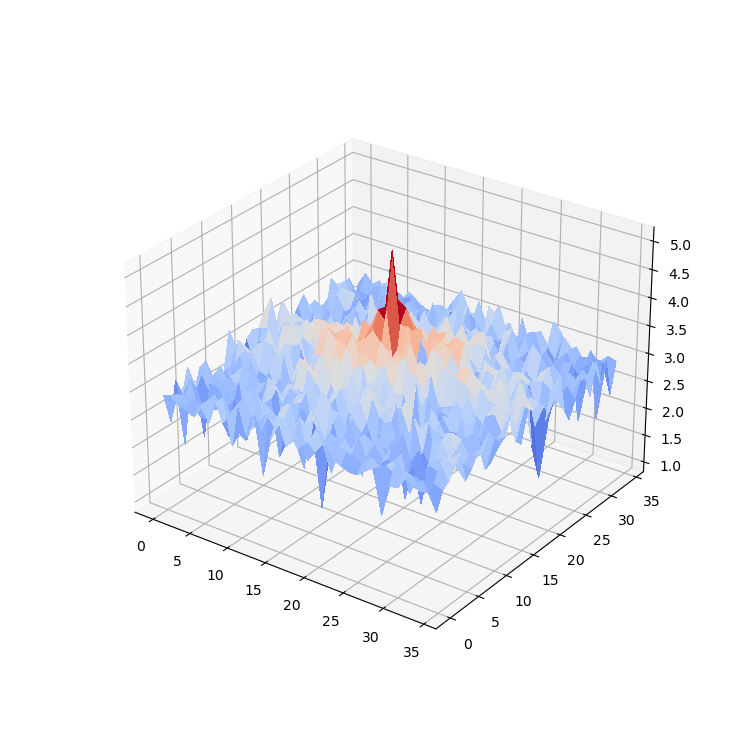

In [24]:
def subSampleN(I, n):
        subI = I[::n,::n]
        ft = fft2(subI)
        ft_log = np.log10(np.abs(fftshift(ft)))                 
        return subI, ft, ft_log

subsample, ft_sub, log_sub =  subSampleN(barbara, 5)                        
imshow(subsample, title='Subsample barbara factor 5')
print('\n\nFT SUBSAMPLED IMAGE FACTOR 5\n\n')                         
surf(log_sub, title='log_ft')

subsample, ft_sub, log_sub =  subSampleN(barbara, 10)                        
imshow(subsample, title='Subsample barbara factor 10')
print('\n\nFT SUBSAMPLED IMAGE FACTOR 1O\n\n')                         
surf(log_sub, title='log_ft')

subsample, ft_sub, log_sub =  subSampleN(barbara, 15)                        
imshow(subsample, title='Subsample barbara factor 15')
print('\n\nFT SUBSAMPLED IMAGE FACTOR 15\n\n')                         
surf(log_sub, title='log_ft')

As we can appreciate from analyzing the spectrum of the FT of the subsampled image, there is a big deterioration in its plot. The Dirac impulse is not the only peak anymore but we can observe the presence of other smaller peaks due to the important loss of information of the subsampling. 

3. Bonus question: same question with the image `img/mandrill.png`.

<IPython.core.display.Javascript object>


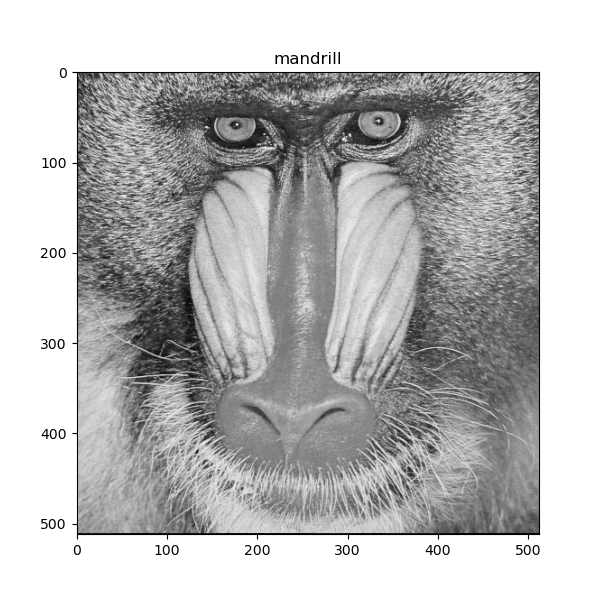

<IPython.core.display.Javascript object>


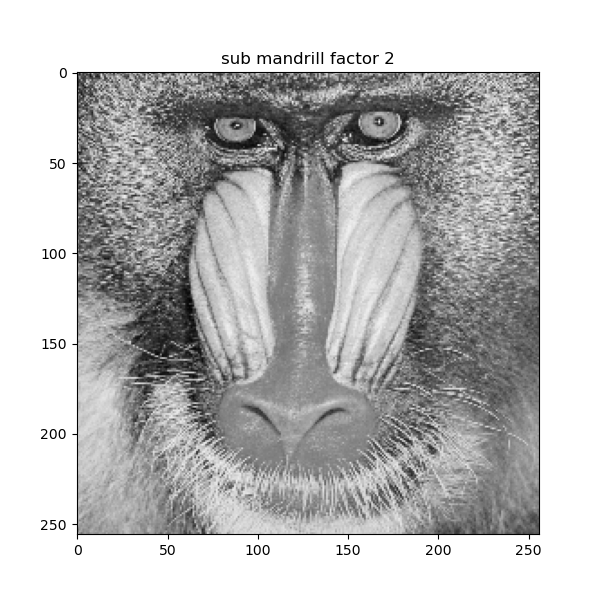

<IPython.core.display.Javascript object>


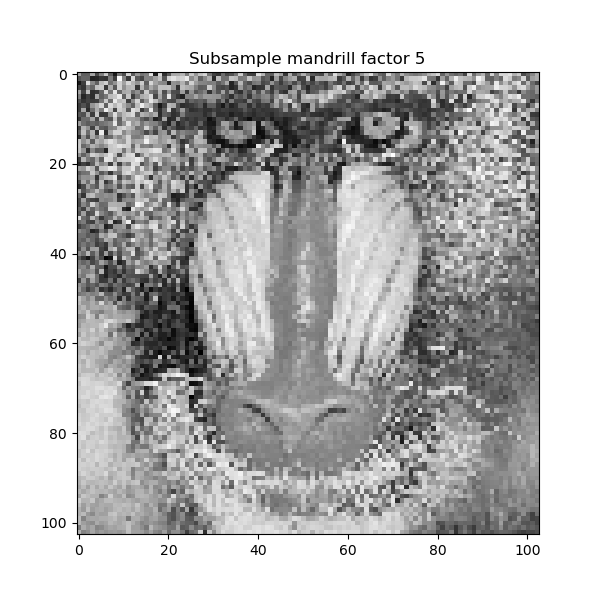



FT SUBSAMPLED IMAGE FACTOR 5




<IPython.core.display.Javascript object>


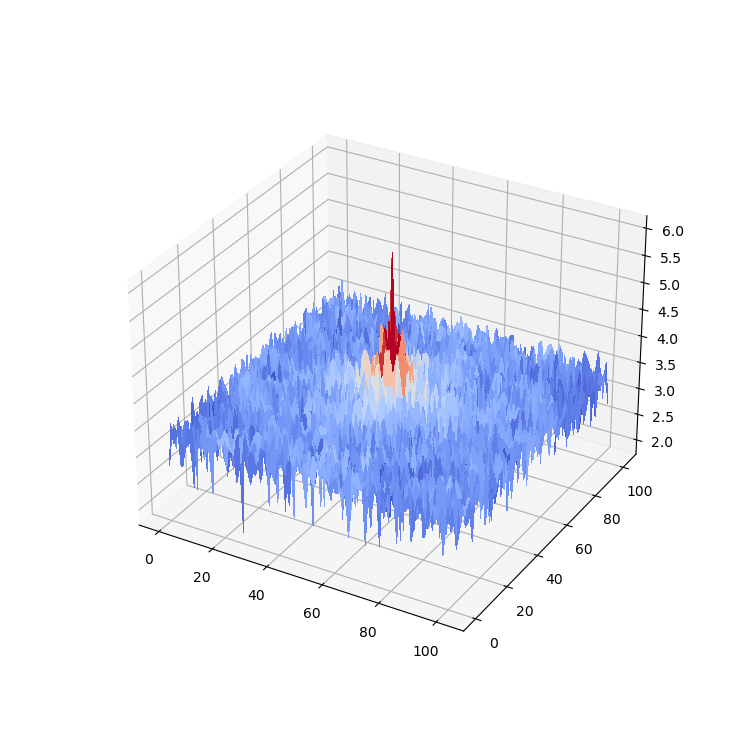

C:\Users\Enrico\AppData\Local\Temp\ipykernel_8196\2371789090.py:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection='3d')


<IPython.core.display.Javascript object>


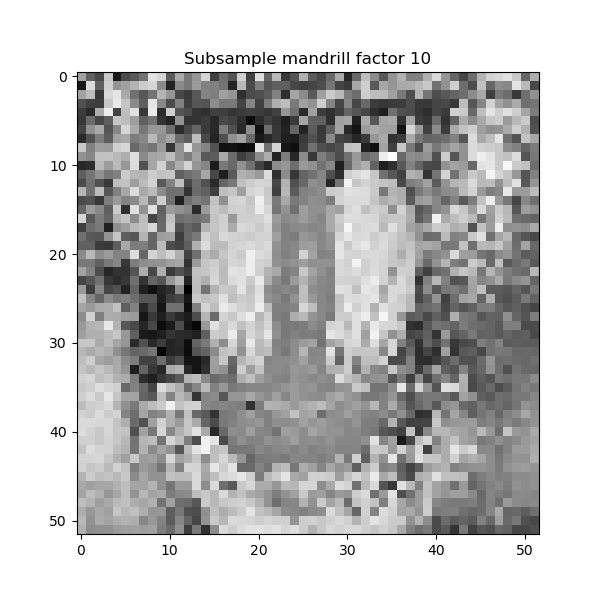



FT SUBSAMPLED IMAGE FACTOR 1O




<IPython.core.display.Javascript object>


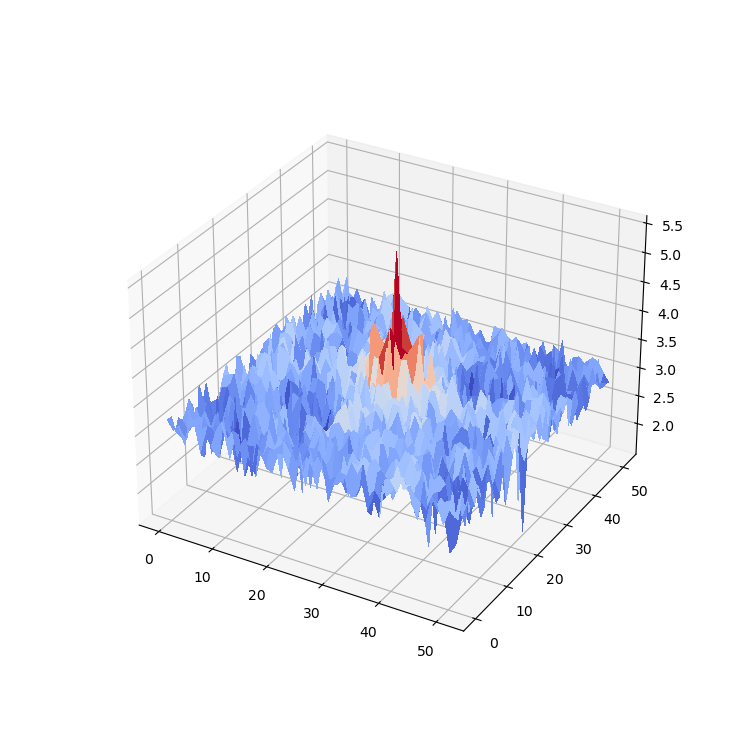

<IPython.core.display.Javascript object>


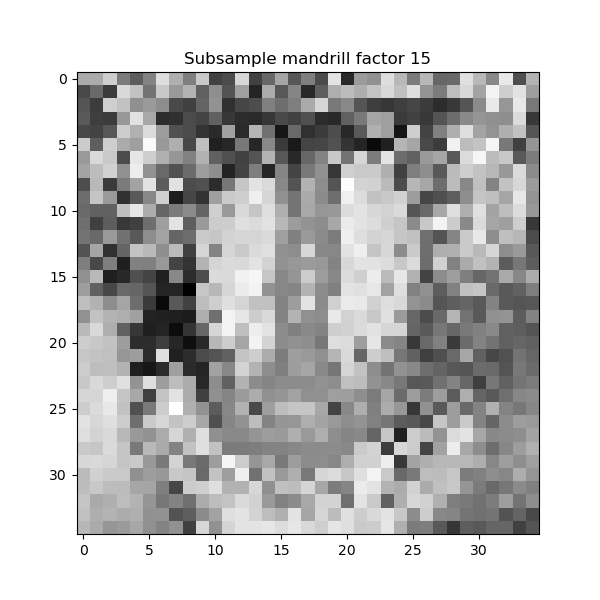



FT SUBSAMPLED IMAGE FACTOR 15




<IPython.core.display.Javascript object>


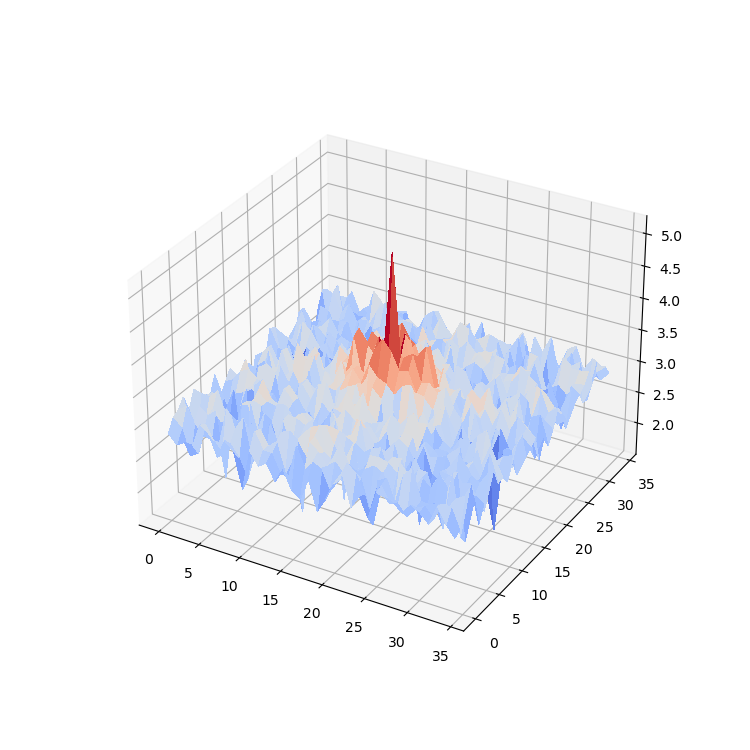

In [25]:
mandrill = np.array(Image.open('img/mandrill.png'))

imshow(mandrill, title='mandrill')

sub_mandrill = subSample2(mandrill)

imshow(sub_mandrill, title='sub mandrill factor 2')

subsample, ft_sub, log_sub =  subSampleN(mandrill, 5)                        
imshow(subsample, title='Subsample mandrill factor 5')
print('\n\nFT SUBSAMPLED IMAGE FACTOR 5\n\n')                         
surf(log_sub, title='log_ft')

subsample, ft_sub, log_sub =  subSampleN(mandrill, 10)                        
imshow(subsample, title='Subsample mandrill factor 10')
print('\n\nFT SUBSAMPLED IMAGE FACTOR 1O\n\n')                         
surf(log_sub, title='log_ft')

subsample, ft_sub, log_sub =  subSampleN(mandrill, 15)                        
imshow(subsample, title='Subsample mandrill factor 15')
print('\n\nFT SUBSAMPLED IMAGE FACTOR 15\n\n')                         
surf(log_sub, title='log_ft')